In [76]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2011-1-1', end='2019-12-31')['Adj Close']

In [80]:
log_returns = np.log(1 + data.pct_change())

$$
    S_t = S_{t-1}\cdot e^{((r-\frac{1}{2}\cdot stdev^2)\cdot\delta_t + stdev\cdot\sqrt{\delta_t}\cdot Z_t)}
$$

In [81]:
r = 0.006

In [82]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.148889
dtype: float64

In [83]:
type(stdev)

pandas.core.series.Series

In [84]:
stdev = stdev.values
stdev

array([0.14888919])

In [86]:
T = 1.0
t_intervals  =250
delta_t = T / t_intervals

iterations = 10000

In [87]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

$$
    S_t = S_{t-1}\cdot e^{((r-\frac{1}{2}\cdot stdev^2)\cdot\delta_t + stdev\cdot\sqrt{\delta_t}\cdot Z_t)}
$$

In [89]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 *Z[t])

In [90]:
S

array([[118.89897919, 118.89897919, 118.89897919, ..., 118.89897919,
        118.89897919, 118.89897919],
       [118.73678799, 117.93134183, 118.25676719, ..., 121.14808171,
        117.48538848, 120.75687424],
       [118.46841532, 119.4537576 , 119.12531537, ..., 122.01062488,
        118.02746914, 118.55088046],
       ...,
       [ 99.2171974 , 105.27519042,  99.57936218, ..., 115.76836964,
        106.79318043, 103.2060432 ],
       [102.21811784, 105.13561484,  98.72055781, ..., 117.30361881,
        107.0970077 , 102.02022678],
       [101.00503358, 104.54034762,  98.55586627, ..., 117.98858145,
        107.5094721 , 102.89483199]])

In [91]:
S.shape

(251, 10000)

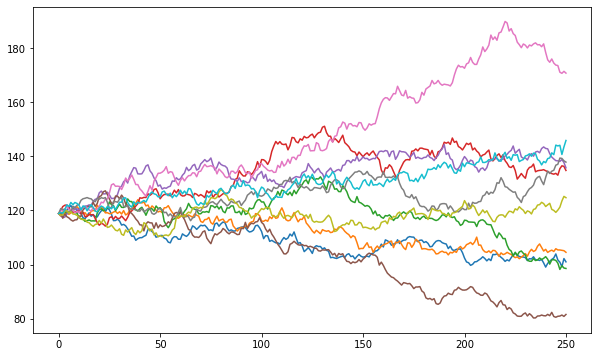

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);